## Augmentation functions of blend group
#### **[overview]()** **[docs]()**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap

In [2]:
image = ia.quokka(size=(128, 128), extract="square")

In [3]:
def print_aug(aug, n=16):
    # Augment images and segmaps.
    images_aug = []

    for _ in range(n):
        images_aug_i = aug(image=image)
        images_aug.append(images_aug_i)

    cells = []
    for image_aug in images_aug:
        cells.append(image_aug)                                      

    # Convert cells to a grid image and save.
    result_grid_image = ia.draw_grid(cells, cols=8)

    # plot functions 
    # note that the last image is augmented by matplotlib to make classes distingushable

    plt.figure()
    f, window = plt.subplots(1,1,figsize=(40,20)) 
    window.imshow(result_grid_image)
    window.axis('off')

<Figure size 432x288 with 0 Axes>

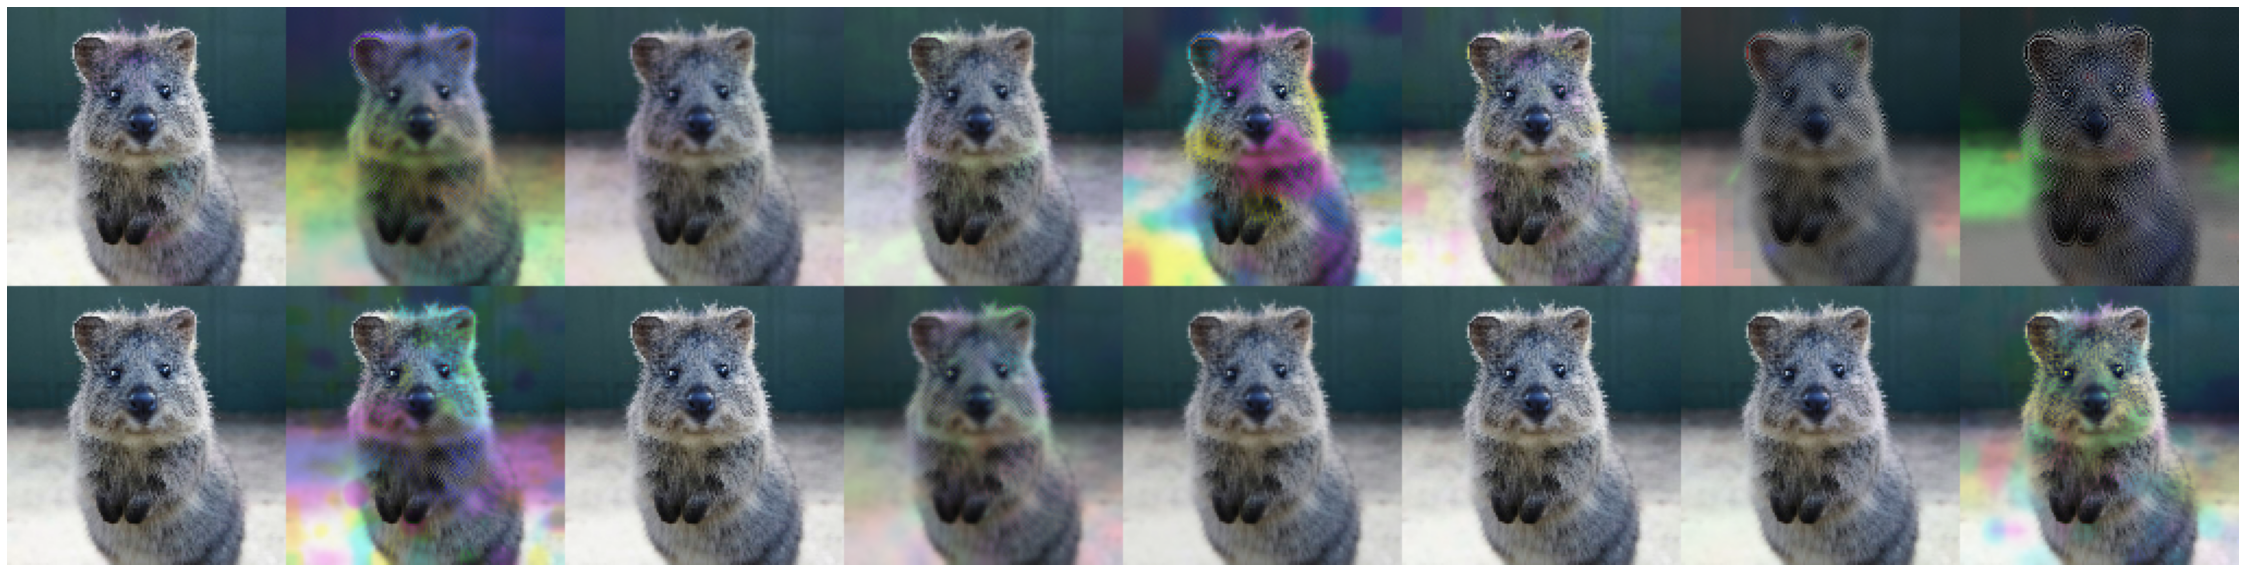

In [4]:
seq = iaa.BlendAlphaFrequencyNoise(
    foreground=iaa.EdgeDetect(iap.Absolute(iap.Normal(0.2, 0.25))),
    per_channel=True
)
 
print_aug(seq)